<a href="https://colab.research.google.com/github/ttobaegi/ML_Python/blob/master/EDA_BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 Colab 서버 세팅

In [2]:
print('===== OS =====')
!cat /etc/issue.net

print('===== CPU =====')
!cat /proc/cpuinfo

print('===== Memory =====')
!cat /proc/meminfo

print('===== Disk =====')
!df -h

print('===== GPU =====')
!nvidia-smi

===== OS =====
Ubuntu 18.04.5 LTS
===== CPU =====
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physic

### 데이터 설명

###### 2008~2013년에 수집한 데이터를 통해 포루투갈 은행의 텔레마케팅 데이터를 150개 피처의 데이터를 수집 
######2012년 7월 이전까지의 데이터로 22개의 피처로 데이터 모델링


Output variable (desired target):y
#### Has the client subscribed a term deposit? 고객의 정기예금 신청 여부 확인

#### Business Need : **To identify their customers who potentially would subscribe to their term deposits**

### library  설정

In [33]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')         # Suppress Depreciation and Incorrect Usage Warnings

## Data Null check
import missingno as msno  

## 나눔고딕 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

## Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# Configure Visualization
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.style.use('fivethirtyeight')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 18,8

# 나눔고딕 폰트 설정 세팅
matplotlib.front_manager._rebuild()
matplotlib.rc('font', family = 'NanumGothic')
# 나눔고딕 폰트 그래프내 깨지는 경우 대비
mpl.rcParams['axes.unicode_minus'] = False




Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetyp

AttributeError: ignored

In [34]:
# 데이터 불러오기 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### EDA

**Setps to follow below**
1.   EDA
> *   Univariate Analysis
> *   Bivariate Analysis
> * Insights Exploration
2.   Preprocessing
> *   Data Transformation
> *  Feature Engineering

3. Modelling
> * Model Development
> * Model Evaluation
> * Model Comparison

In [35]:
df = pd.read_csv('/content/drive/MyDrive/ML_BankMarketing/bank-additional-full.csv', sep=';')
df.shape

(41188, 21)

#### basic

In [36]:
# feature engineering 변수 파악
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
# 변수 확인
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [32]:
# 특정 변수
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

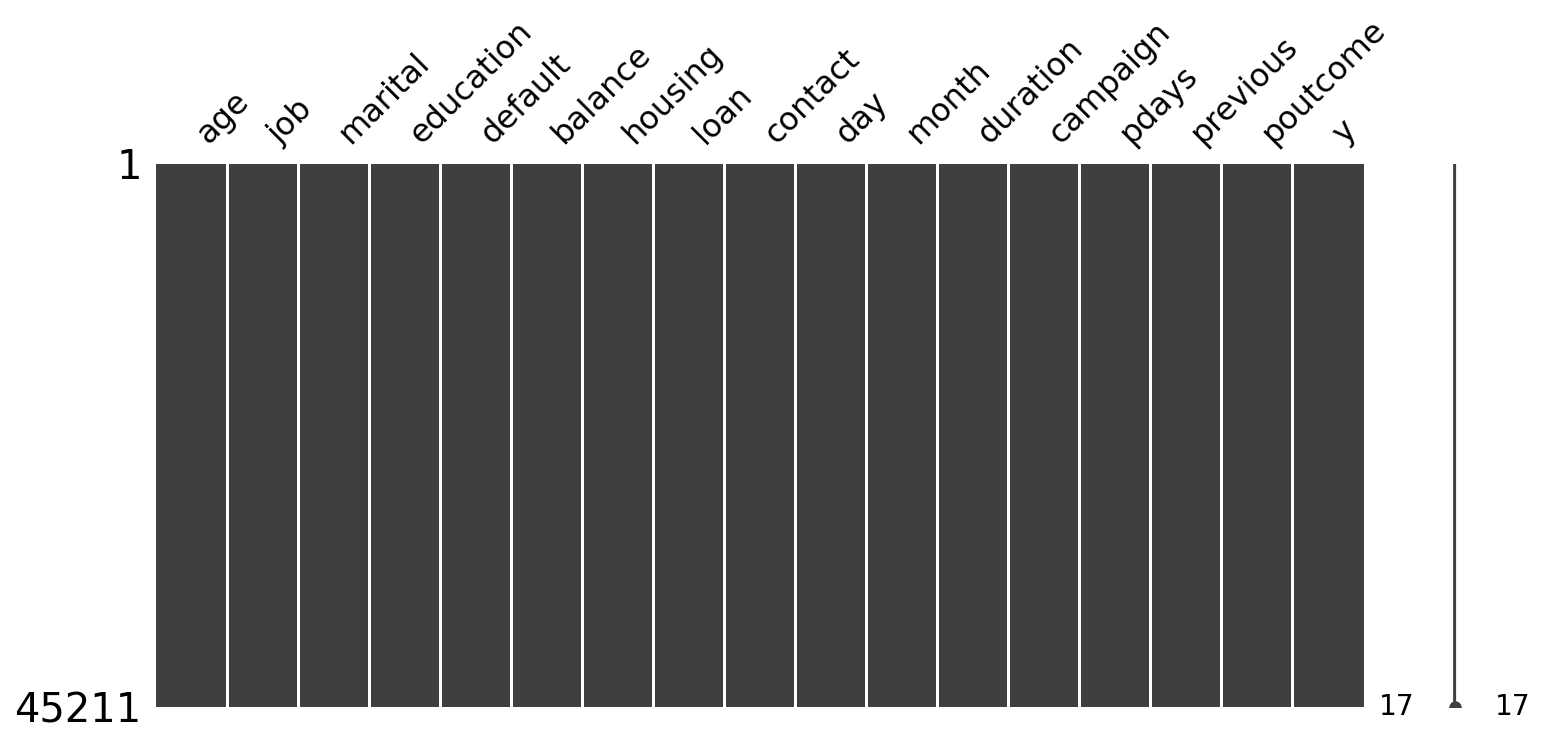

In [30]:
# Null 데이터 체크 - 시각화
msno.matrix(df, figsize=(12,5))

In [43]:
# Null 데이터 체크
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [45]:
df=df.rename(columns={'y':'deposit'}) #예측변수 y > deposit으로 rename

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f772b6189d0>,
      dtype=object)

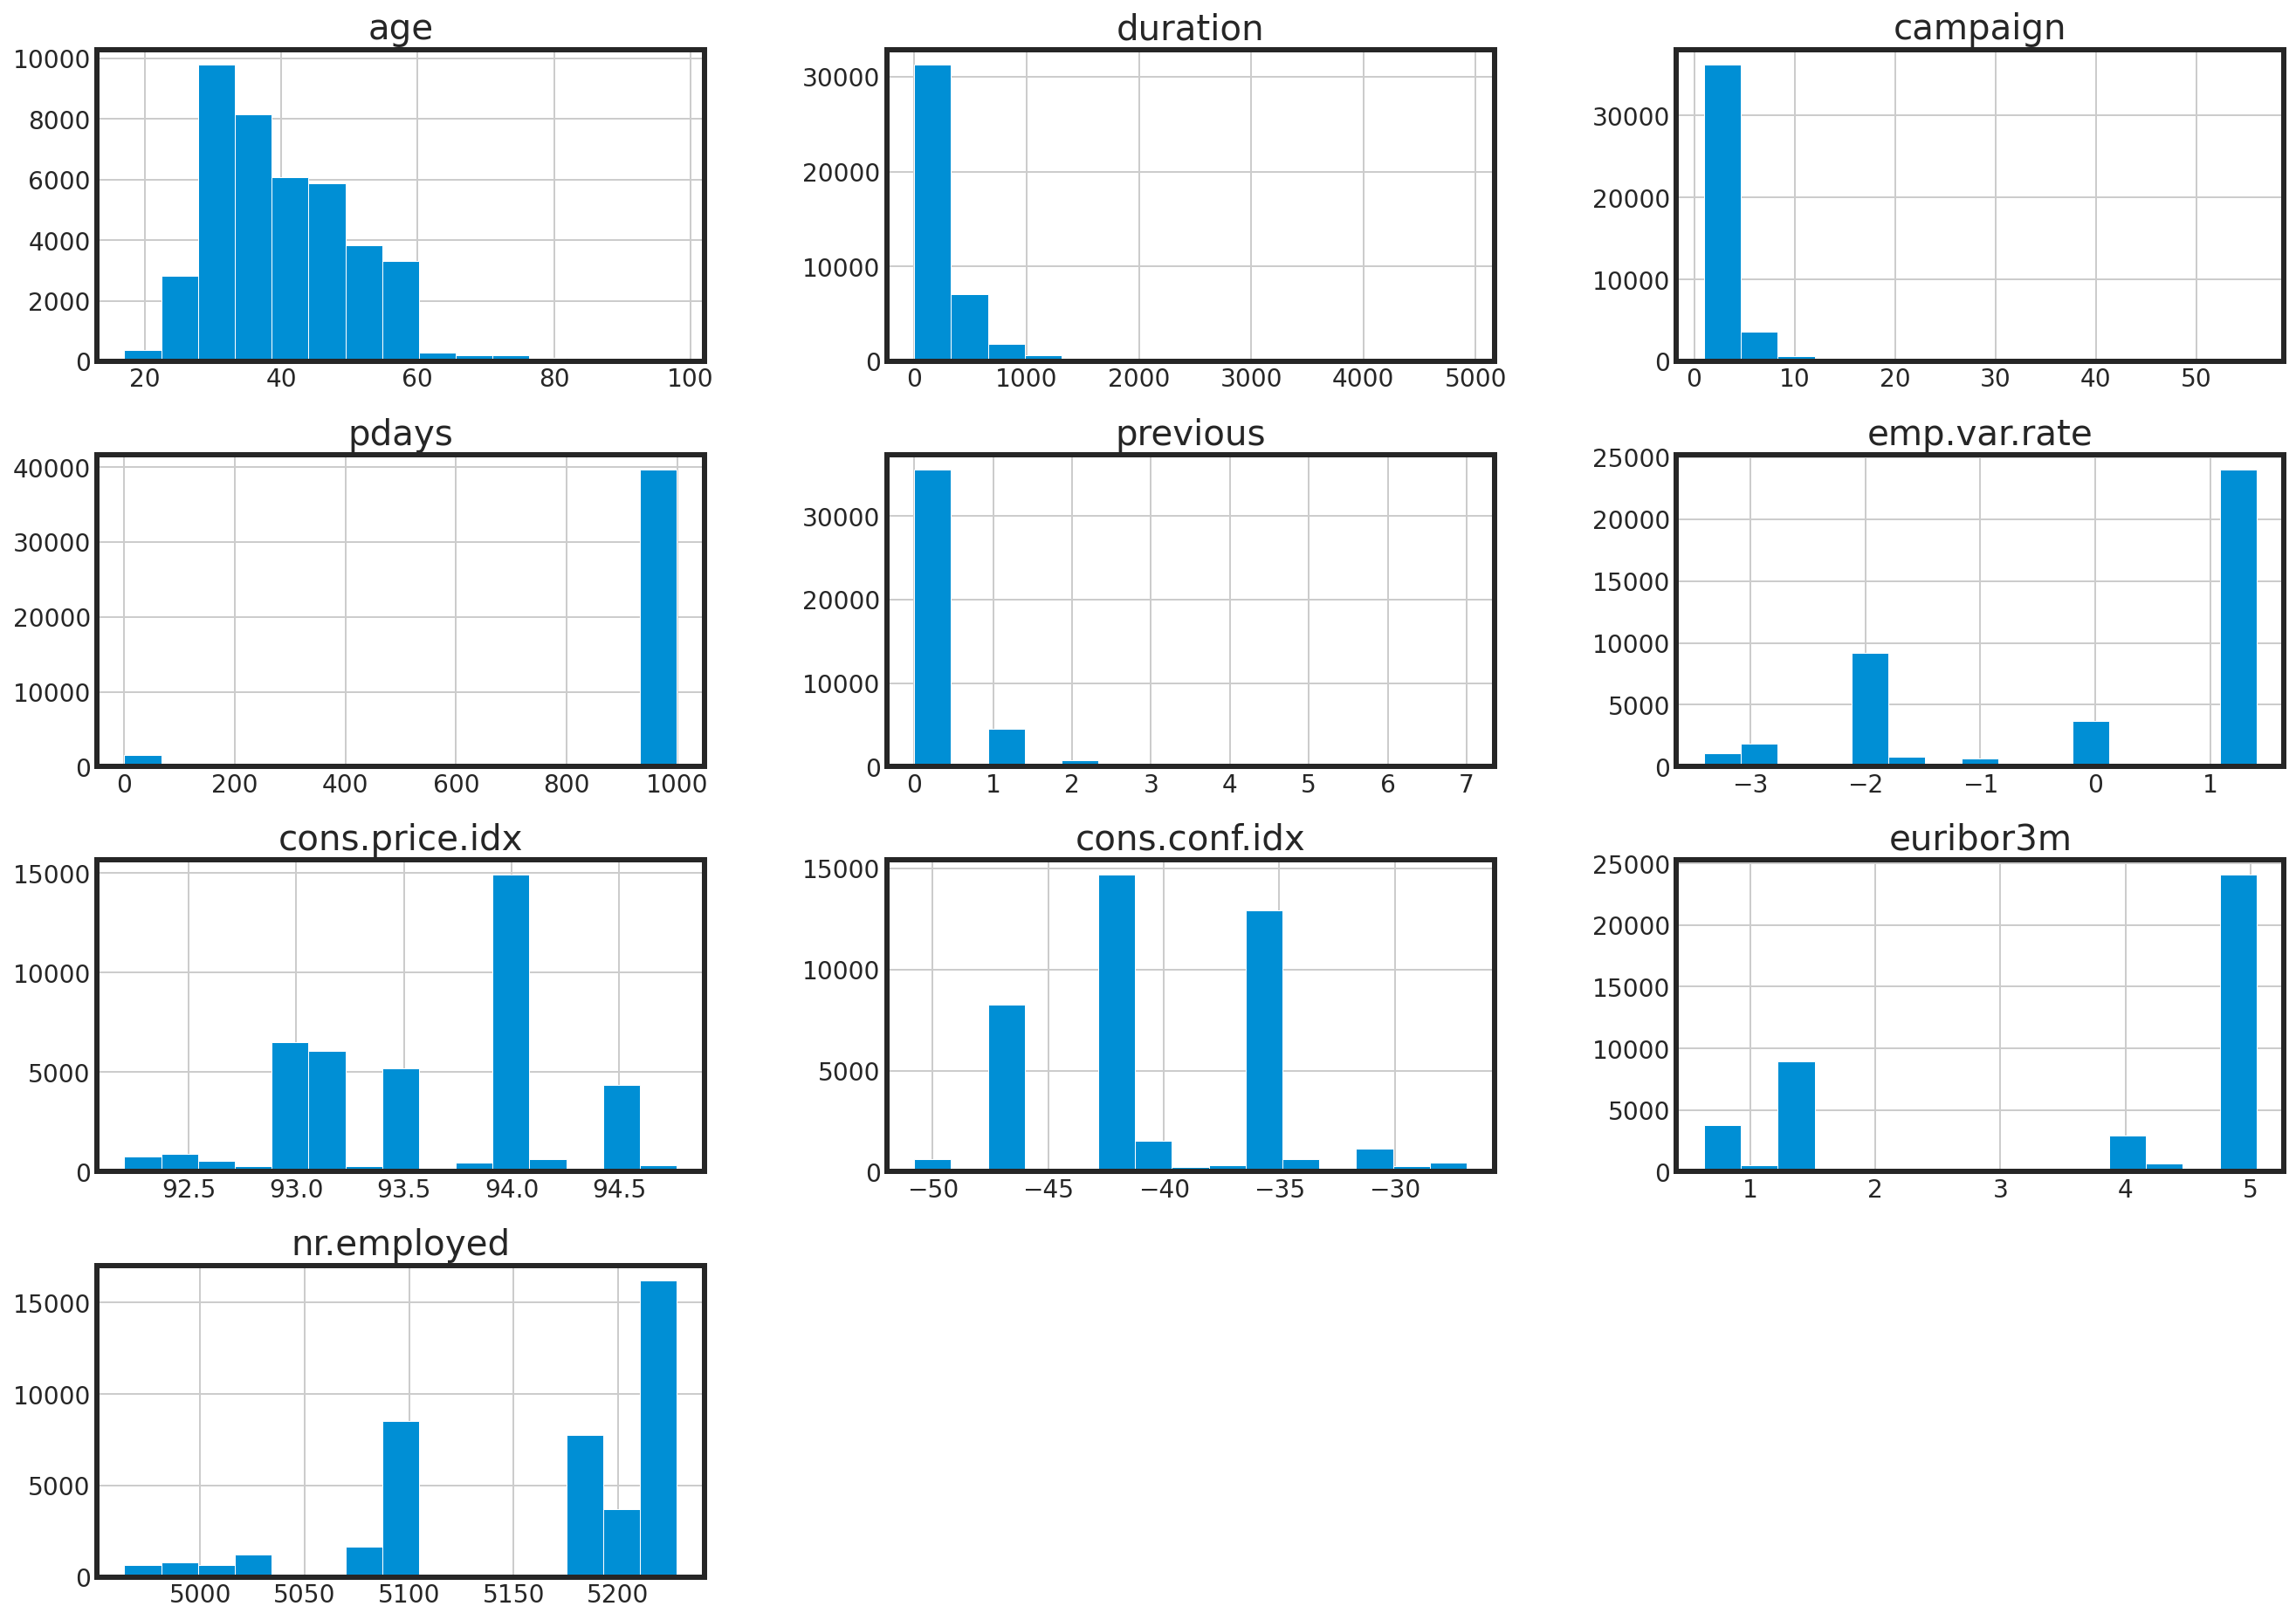

In [42]:
df.hist(figsize=(20,15), bins=15)

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

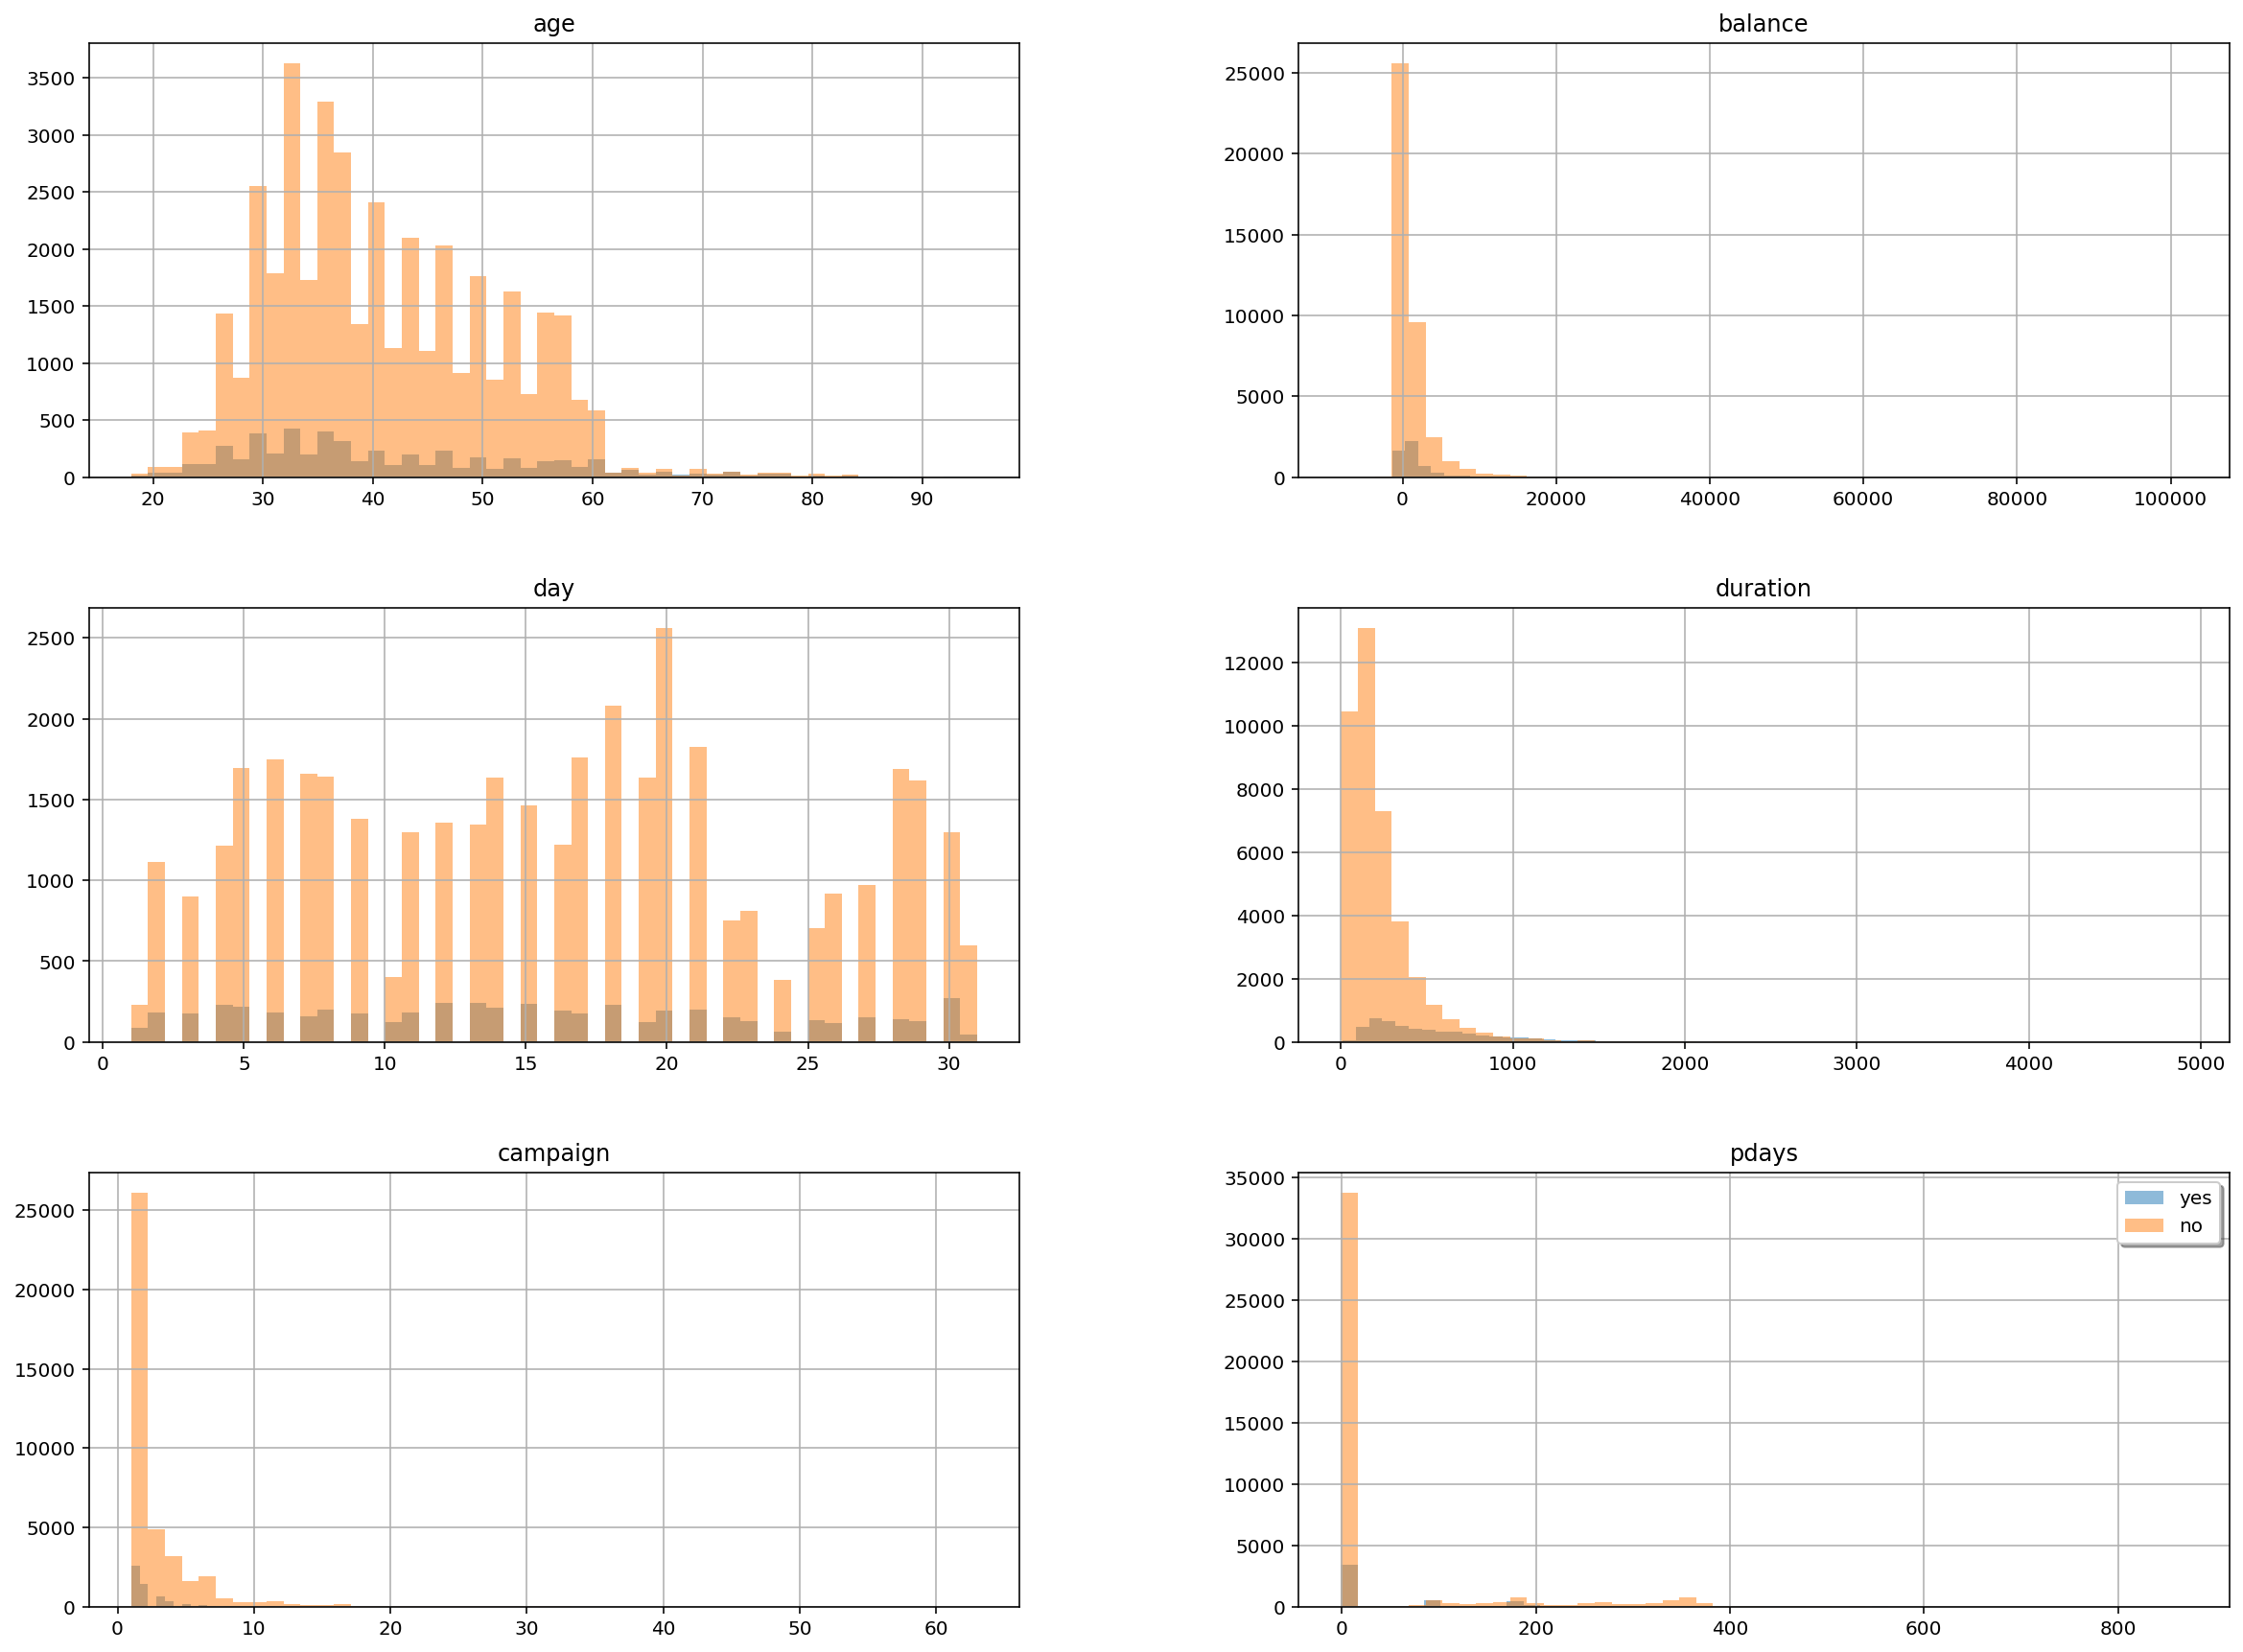

In [19]:
fix, ax = plt.subplots(3,2, figsize=(20,15))
h=df.loc[df['deposit']=='yes', num_cols[:6]].hist(alpha=0.5, bins=50, ax=ax)
h=df.loc[df['deposit']=='no', num_cols[:6]].hist(alpha=0.5, bins=50, ax=ax)
plt.legend(['yes','no'],shadow=True)

#### **Univariate Analysis**

In [44]:
# A class for Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77296826d0>,
      dtype=object)

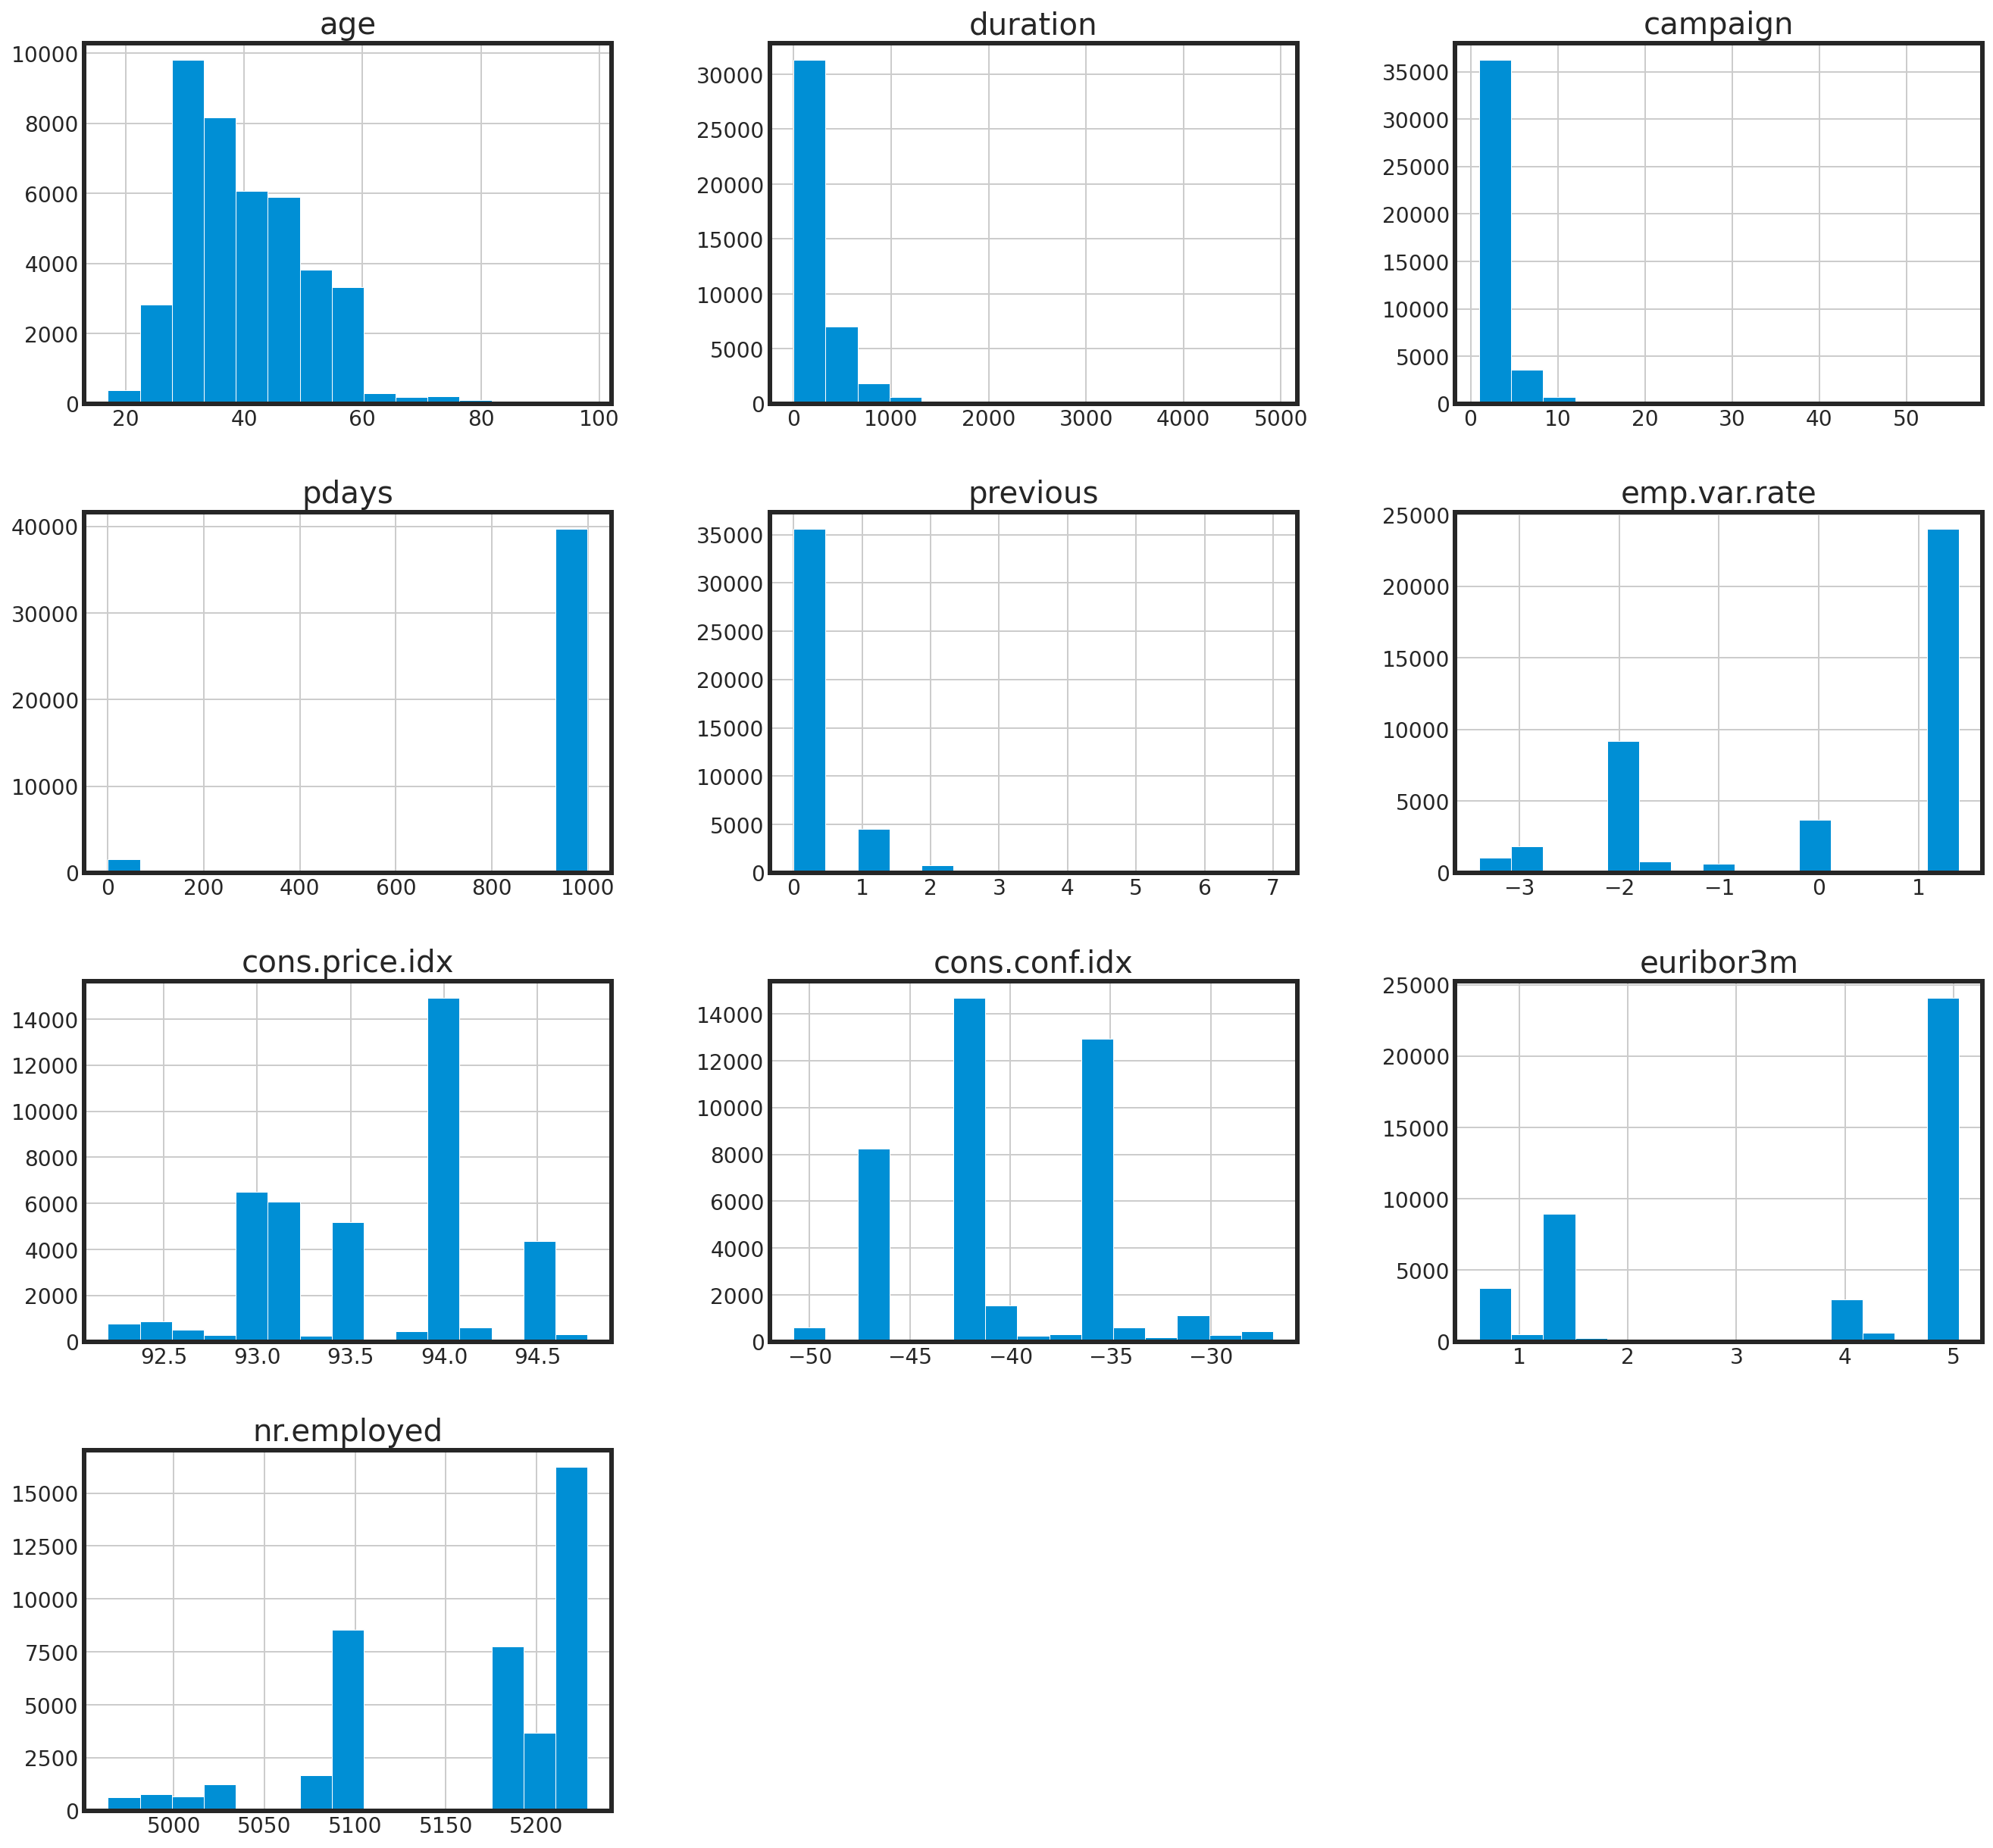

In [55]:
# distribution of variables 
df.hist(figsize=(20,20), bins=15)

**Insights**
> - Duration is left skewed meaning that most values is small and only a few is too large compared to the minimum

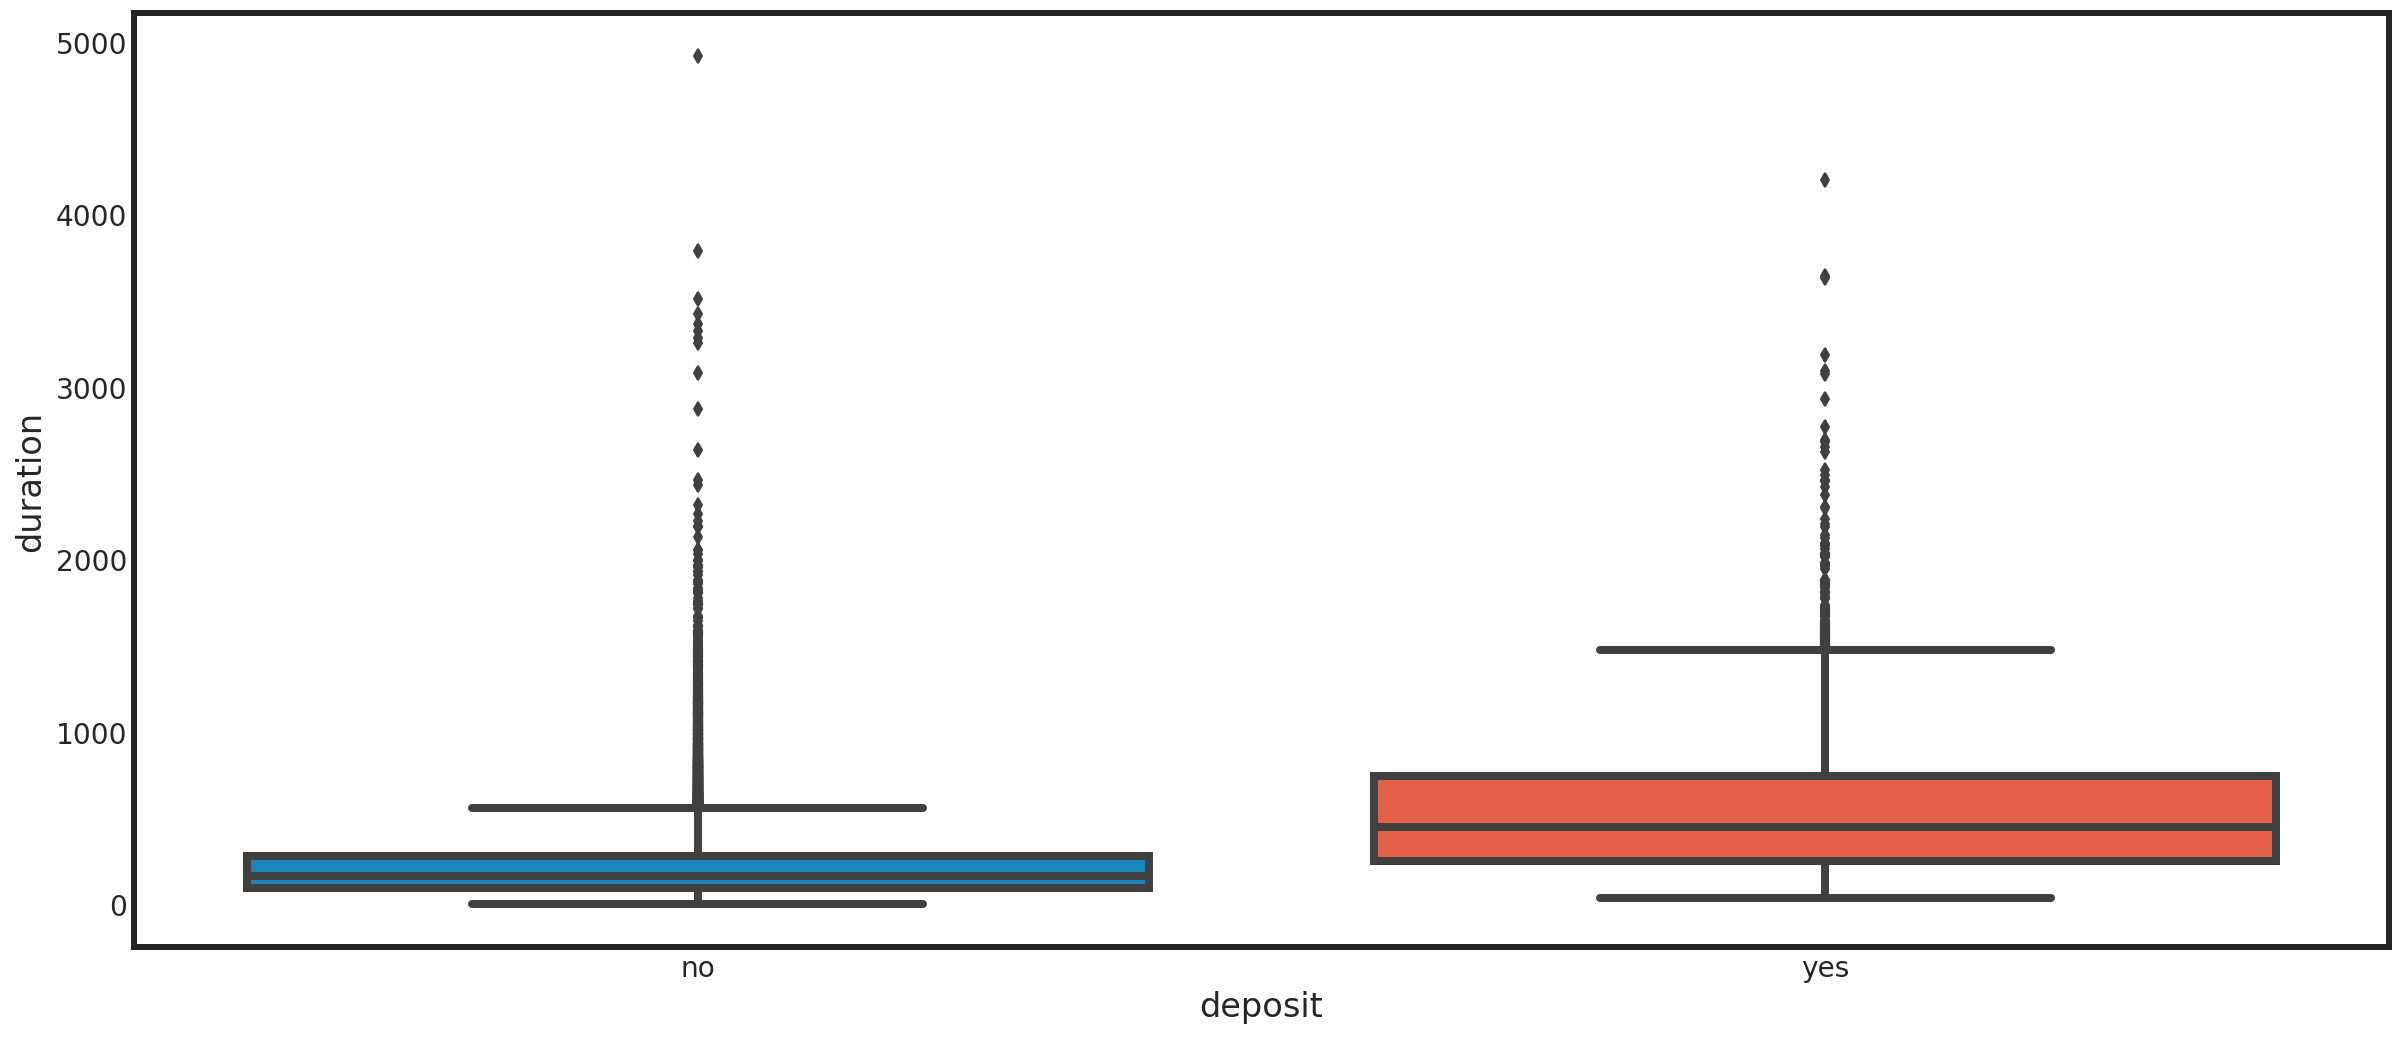

In [57]:
# Distribution of duration for each 'deposit'
sns.boxplot(data=df, x='deposit',y='duration')

**Duration seems to be a good separator feature for our target y**
> 1. avg duration for each y 차이 
> 2. outlier존재 : deposit no

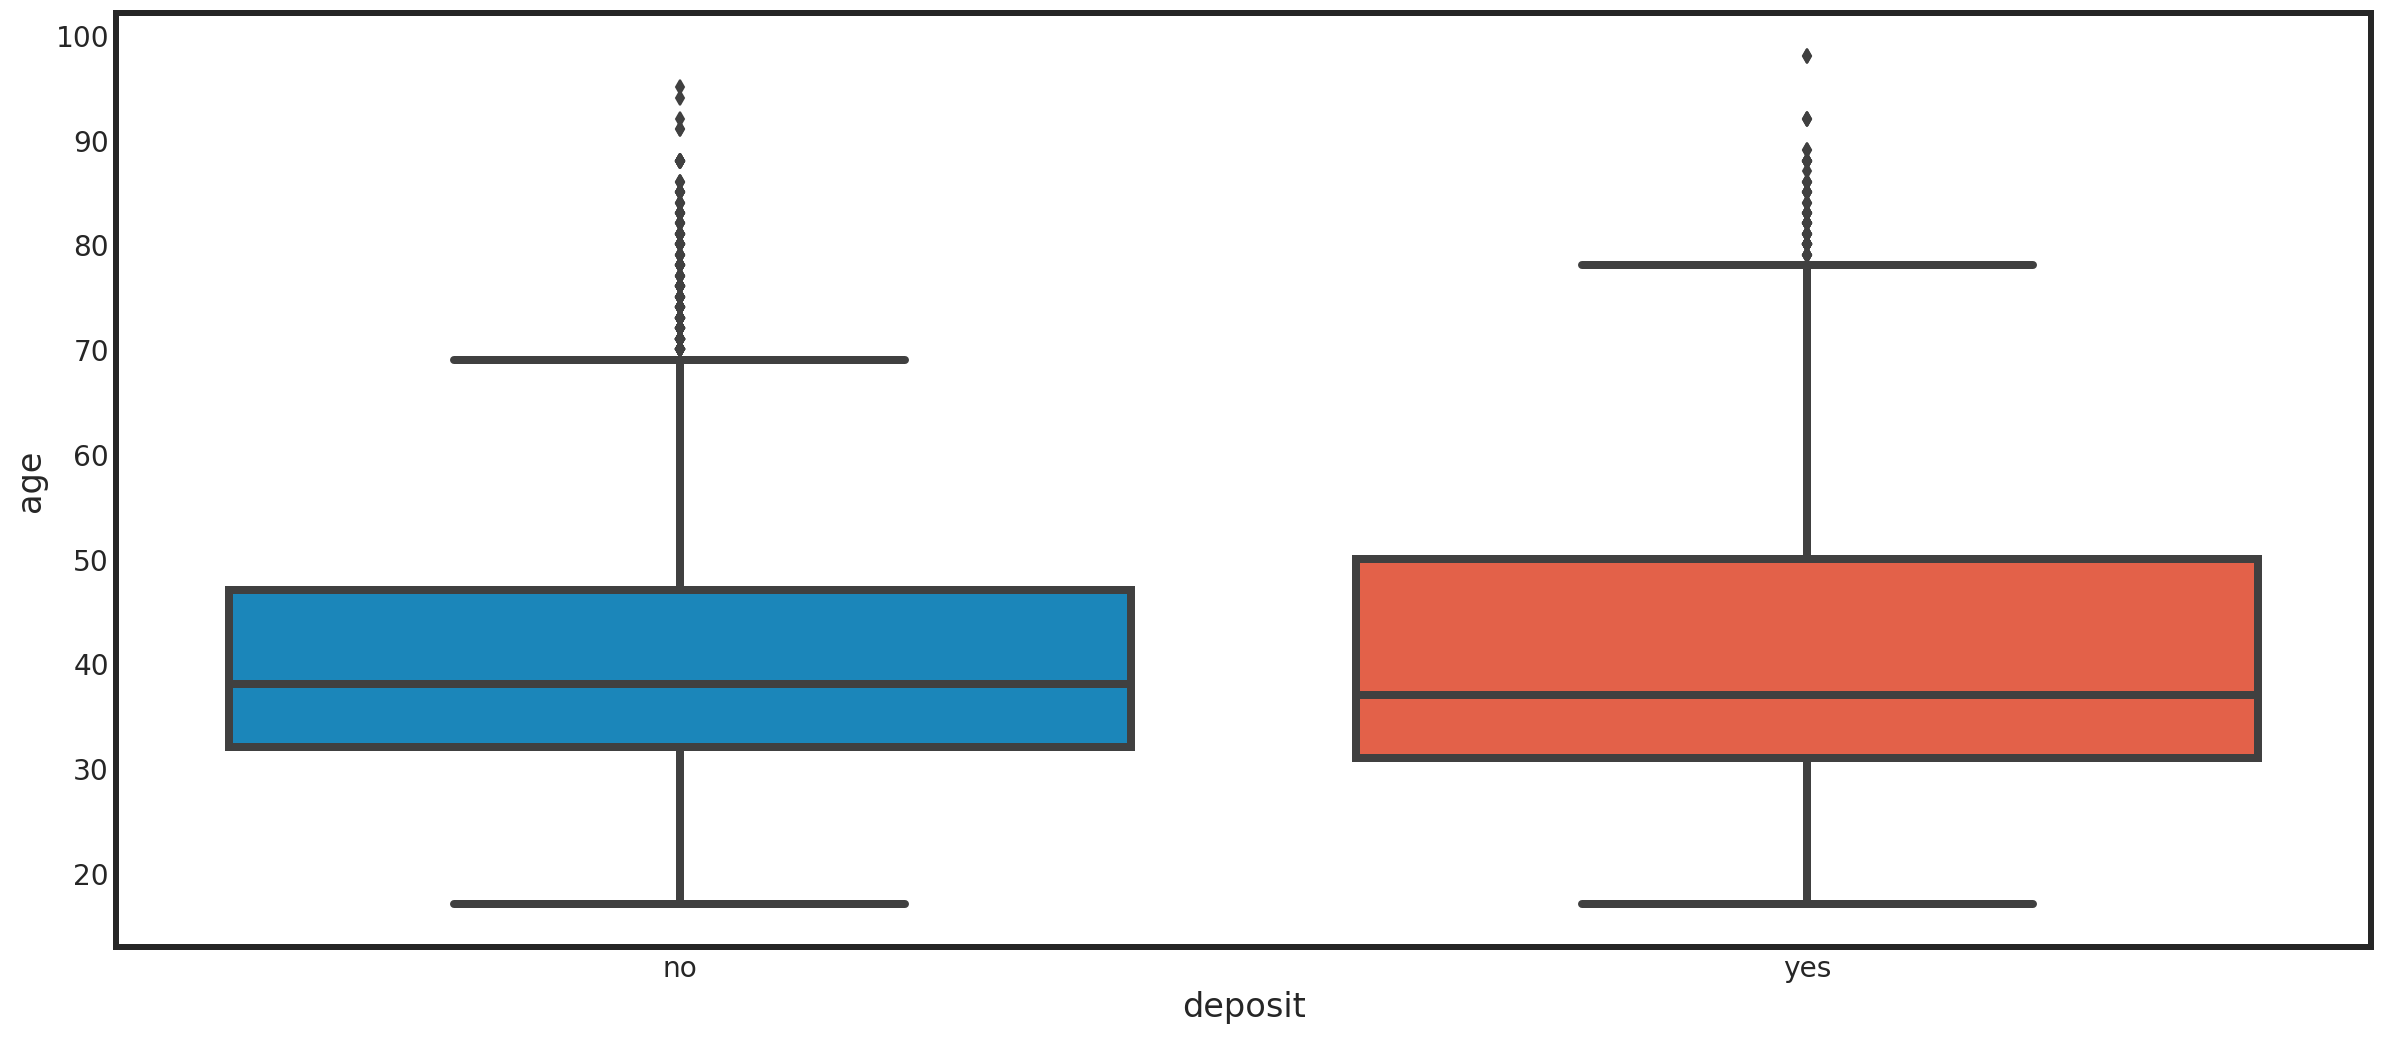

In [48]:
# Distribution of age for each 'deposit'
sns.boxplot(data=df, x='deposit', y='age' )

** Age differs according to the target**
> maximum of the age of client that subscribe is higher than the other

In [58]:
# correlation between some of the continuous columns
sns.scatterplot(data=df, x=)

#### **Bivariate Analysis**

In [ ]:
# A class for Data Visualization

#### **Insights**